# CNN - Cat vs Dog Classification Assignment

In [1]:
# Imports the library
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing import image
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns


In [2]:
import os
from PIL import Image
import numpy as np

base_path = 'cats_and_dogs'
folders = [
    'train/cats', 'train/dogs',
    'validation/cats', 'validation/dogs'
]


for folder in folders:
    path = os.path.join(base_path, folder)
    os.makedirs(path, exist_ok=True)


In [3]:
# Dummy grayscale images बनाएं
def create_dummy_images(folder_path, label, count=5):
    for i in range(count):
        img = Image.fromarray(np.random.randint(0, 255, (150, 150, 3), dtype=np.uint8))
        img.save(os.path.join(folder_path, f"{label}.{i}.jpg"))

# 5 dummy cat और dog images train और validation में डालें
create_dummy_images('cats_and_dogs/train/cats', 'cat')
create_dummy_images('cats_and_dogs/train/dogs', 'dog')
create_dummy_images('cats_and_dogs/validation/cats', 'cat')
create_dummy_images('cats_and_dogs/validation/dogs', 'dog')


In [4]:
# cats_and_dogs/train/cats
# cats_and_dogs/train/dogs
# cats_and_dogs/validation/cats
# cats_and_dogs/validation/dogs

In [5]:
# Step 1:- create a 'Cats and Dogs' Dataset Directory Structure

cats_and_dogs_dir = 'cats_and_dogs' #changed path to the current working directory
base_dir = os.path.abspath(cats_and_dogs_dir)
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Print the directory paths to confirm correctness
print(f"Train Directory: {train_dir}")
print(f"Validation Directory: {validation_dir}")

Train Directory: /content/cats_and_dogs/train
Validation Directory: /content/cats_and_dogs/validation


In [6]:
# Step 2:- Data Augmentation and Preprocessing
train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range = 40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip = True,
        fill_mode = 'nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir, # Make sure this path is correct and points to your training data
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary') # Change to 'categorical' if you have more than 2 classes

print(train_generator.filepaths) # added to print the file paths of the training images
print(train_generator.classes) # added to print the class labels of the training images



validation_generator = val_datagen.flow_from_directory(
        validation_dir, # Make sure this path is correct and points to your validation data
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary') # Change to 'categorical' if you have more than 2 classes

print(validation_generator.filepaths) # added to print the file paths of the validation images
print(validation_generator.classes) # added to print the class labels of the validation images

Found 10 images belonging to 2 classes.
['/content/cats_and_dogs/train/cats/cat.0.jpg', '/content/cats_and_dogs/train/cats/cat.1.jpg', '/content/cats_and_dogs/train/cats/cat.2.jpg', '/content/cats_and_dogs/train/cats/cat.3.jpg', '/content/cats_and_dogs/train/cats/cat.4.jpg', '/content/cats_and_dogs/train/dogs/dog.0.jpg', '/content/cats_and_dogs/train/dogs/dog.1.jpg', '/content/cats_and_dogs/train/dogs/dog.2.jpg', '/content/cats_and_dogs/train/dogs/dog.3.jpg', '/content/cats_and_dogs/train/dogs/dog.4.jpg']
[0 0 0 0 0 1 1 1 1 1]
Found 10 images belonging to 2 classes.
['/content/cats_and_dogs/validation/cats/cat.0.jpg', '/content/cats_and_dogs/validation/cats/cat.1.jpg', '/content/cats_and_dogs/validation/cats/cat.2.jpg', '/content/cats_and_dogs/validation/cats/cat.3.jpg', '/content/cats_and_dogs/validation/cats/cat.4.jpg', '/content/cats_and_dogs/validation/dogs/dog.0.jpg', '/content/cats_and_dogs/validation/dogs/dog.1.jpg', '/content/cats_and_dogs/validation/dogs/dog.2.jpg', '/content/

In [7]:
# 3 Create Model
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
# 4. Compile Model
model.compile(loss='binary_crossentropy', optimizer=SGD(learning_rate=0.01), metrics=['accuracy'])

In [9]:
# 5. Train The Model
history = model.fit(train_generator, epochs=15, validation_data=validation_generator)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.6000 - loss: 0.6875 - val_accuracy: 0.5000 - val_loss: 0.6945
Epoch 2/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 714ms/step - accuracy: 0.3000 - loss: 0.7192 - val_accuracy: 0.5000 - val_loss: 0.6945
Epoch 3/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 703ms/step - accuracy: 0.4000 - loss: 0.7124 - val_accuracy: 0.5000 - val_loss: 0.6940
Epoch 4/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 762ms/step - accuracy: 0.5000 - loss: 0.6836 - val_accuracy: 0.5000 - val_loss: 0.6939
Epoch 5/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 864ms/step - accuracy: 0.5000 - loss: 0.7006 - val_accuracy: 0.5000 - val_loss: 0.6935
Epoch 6/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 714ms/step - accuracy: 0.3000 - loss: 0.7108 - val_accuracy: 0.5000 - val_loss: 0.6936
Epoch 7/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.4000 - loss: 0.7070 - val_accuracy: 0.5000 - val_loss: 0.6935
Epoch 8/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.3000 - loss: 0.7122 - val_accuracy: 0.5000 - val_loss: 0.6930
E

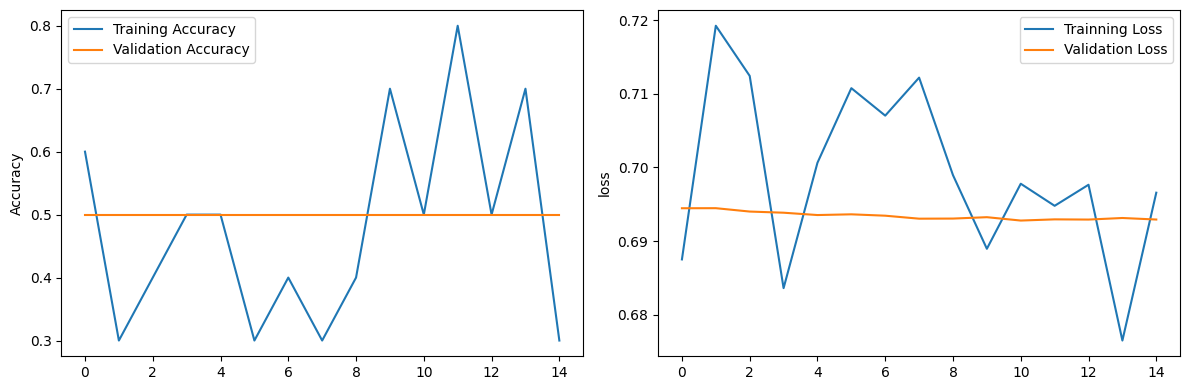

In [10]:
# 6. Evaluation and Plot Results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(acc, label = 'Training Accuracy')
plt.plot(val_acc, label = 'Validation Accuracy')
plt.legend()
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss, label = 'Trainning Loss')
plt.plot(val_loss, label = 'Validation Loss')
plt.legend()
plt.ylabel('loss')
plt.tight_layout()
plt.show()


In [17]:
# 7 Prediction
def predict_image(image_path, model):
    img = image.load_img(image_path, target_size=(150, 150))
    img_tensor = image.img_to_array(img)
    img_tensor = np.expand_dims(img_tensor, axis = 0) / 255.

    # Changed 'prediction' to 'predict'
    prediction = model.predict(img_tensor)[0][0]
    label = 'Dog' if prediction > 0.5 else 'Cat'
    plt.imshow(img)
    plt.title(f"Prediction: {label}")

    plt.axis('off')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


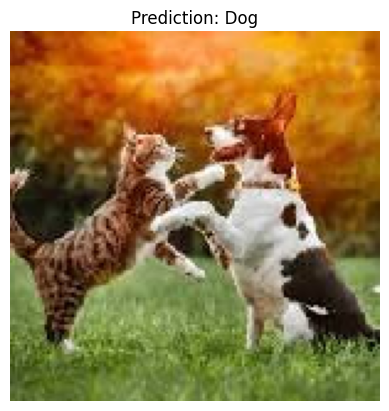

In [18]:
predict_image('/content/download.jpeg', model)